## Malignant Comment Classification Project

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train_malignant.csv')
test=pd.read_csv('test_malignant.csv')

In [3]:
train.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [4]:
test.sample(5)

id                                       comment_text
56220   5d867966b7131959  " \n {| class=""Talk-Notice"" \n |- \n | \n | ...
36064   3bf0f11e7c6cecb9  ". His later lack of ""murderous"" crimes make...
82634   89d2a48d87193794  REDIRECT Talk:Index of Economic Freedom histor...
152672  ff2a564c386b3f99  Mexicans be removed from the United States. Th...
138261  e72106ae682d20d6  " \n\n  \n\n ==Chinatown, Oakland inuse?== \n ...

In [5]:
#checking the total rows and columns present
print('training dataset:',train.shape)
print('test dataset :',test.shape)

training dataset: (159571, 8)
test dataset : (153164, 2)


In [6]:
#checking null values
print('Training Dataset')
print(train.isnull().sum())

Training Dataset
id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


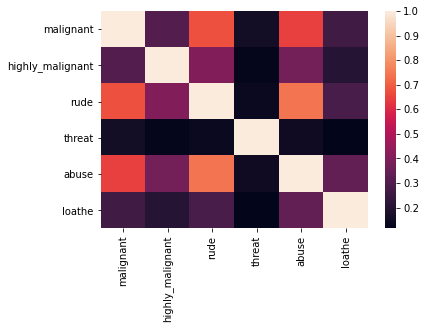

In [7]:
#checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

In [8]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

-----------------------------------------------------------------------------------------------------
malignant
-----------------------------------------------------------------------------------------------------
0    144277
1     15294
Name: malignant, dtype: int64


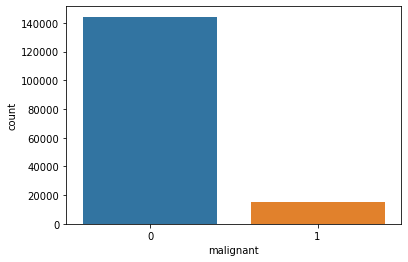

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
highly_malignant
-----------------------------------------------------------------------------------------------------
0    157976
1      1595
Name: highly_malignant, dtype: int64


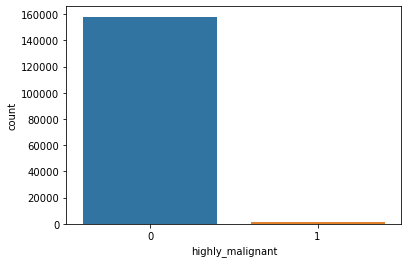

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
rude
-----------------------------------------------------------------------------------------------------
0    151122
1      8449
Name: rude, dtype: int64


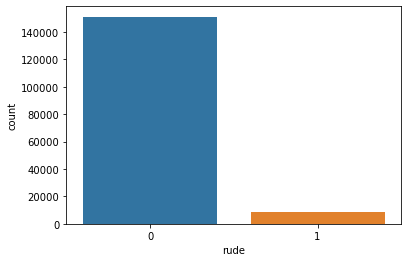

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
threat
-----------------------------------------------------------------------------------------------------
0    159093
1       478
Name: threat, dtype: int64


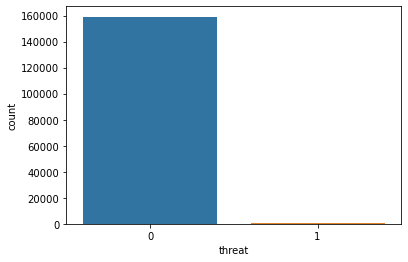

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
abuse
-----------------------------------------------------------------------------------------------------
0    151694
1      7877
Name: abuse, dtype: int64


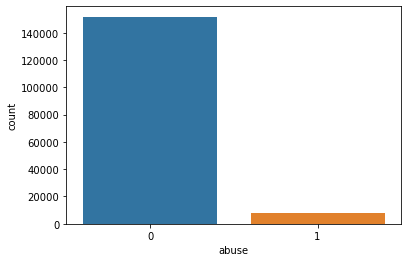

-----------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------
loathe
-----------------------------------------------------------------------------------------------------
0    158166
1      1405
Name: loathe, dtype: int64


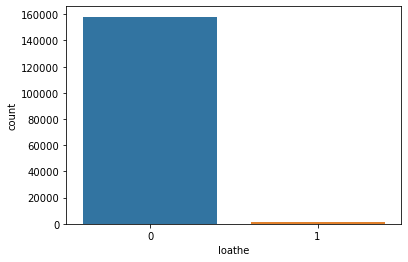

-----------------------------------------------------------------------------------------------------


In [9]:
columns=['malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe']
for col in columns:
    print("-----------------------------------------------------------------------------------------------------")
    print(col)
    print("-----------------------------------------------------------------------------------------------------")
    print(train[col].value_counts())
    sns.countplot(train[col])
    plt.show()
    print("-----------------------------------------------------------------------------------------------------")

In [10]:
print('Training Dataset')
print("-----------------------------------------------------------------------------------------------------")
print(train.describe())

Training Dataset
-----------------------------------------------------------------------------------------------------
           malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50% 

In [11]:
#importing important modules from NLTK library
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [12]:
#convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()
train.head(5)

id                                       comment_text  \
0  0000997932d777bf  explanation\nwhy the edits made under my usern...   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3  0001b41b1c6bb37e  "\nmore\ni can't make any real suggestions on ...   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [13]:
# Replace whitespace(/n) between terms with a single space
train['comment_text'] = train['comment_text'].str.replace('\s+', ' ')

# Remove leading and trailing whitespace
train['comment_text'] = train['comment_text'].str.lstrip()
train['comment_text'] = train['comment_text'].str.rstrip()

train.head(5)

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3  0001b41b1c6bb37e  " more i can't make any real suggestions on im...   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [14]:
#replace 10 digit phone numberswith 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
train.head(5)

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3  0001b41b1c6bb37e  " more i can't make any real suggestions on im...   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [15]:
#replace numbers with 'number'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'number')
train.head(5)

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3  0001b41b1c6bb37e  " more i can't make any real suggestions on im...   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [16]:
#replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
train.head(5)

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3  0001b41b1c6bb37e  " more i can't make any real suggestions on im...   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [17]:
#replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
train.head(5)

id                                       comment_text  \
0  0000997932d777bf  explanation why the edits made under my userna...   
1  000103f0d9cfb60f  d'aww! he matches this background colour i'm s...   
2  000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3  0001b41b1c6bb37e  " more i can't make any real suggestions on im...   
4  0001d958c54c6e35  you, sir, are my hero. any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [18]:
def text(message):
    
    #Check characters to see if they are in punctuation
    no_punc = [char for char in message if char not in string.punctuation]

    #Join the characters again to form the string.
    no_punc = ''.join(no_punc)
    
    #Now just remove any stopwords
    return [word for word in no_punc.split() if word not in stopwords.words('english')]

In [19]:
train['comment_text'].apply(text)

In [20]:
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [21]:
cols_target = ['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']

In [22]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train.head(15))

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
                  id                                       comment_text  \
0   0000997932d777bf  explanation why the edits made under my userna...   
1   000103f0d9cfb60f  d'aww! he match this background colour i'm see...   
2   000113f07ec002fd  hey man, i'm really not trying to edit war. it...   
3   0001b41b1c6bb37e  " more i can't make any real suggestion on imp...   
4   0001d958c54c6e35  you, sir, are my hero. any chance you remember...   
5   00025465d4725e87  " congratulation from me a well, use the tool ...   
6   0002bcb3da6cb337       cocksucker before you piss around on my work   
7   00031b1e95af7921  your vandalism to the matt shirvington article...   
8   00037261f536c51d  sorry if the word 'nonsense' wa offensive to y...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  " fair use rationale for image:wonju.jpg than

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc

In [25]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [26]:
y=train['bad']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)
y_train.shape,y_test.shape

((111699,), (47872,))

In [28]:
# LogisticRegression
LG = LogisticRegression()

LG.fit(x_train,y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy is 0.9590775208372501
Test accuracy is 0.9556316844919787
[[42780   225]
 [ 1899  2968]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43005
           1       0.93      0.61      0.74      4867

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



In [29]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987466315723507
Test accuracy is 0.9399022393048129
[[41624  1381]
 [ 1496  3371]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     43005
           1       0.71      0.69      0.70      4867

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



In [30]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9987376789407246
Test accuracy is 0.9567179144385026
[[42495   510]
 [ 1562  3305]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     43005
           1       0.87      0.68      0.76      4867

    accuracy                           0.96     47872
   macro avg       0.92      0.83      0.87     47872
weighted avg       0.95      0.96      0.95     47872



In [31]:
# xgboost
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9618796945362089
Test accuracy is 0.9532712232620321
[[42733   272]
 [ 1965  2902]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43005
           1       0.91      0.60      0.72      4867

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [32]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940213 stored elements in Compressed Sparse Row format>

In [ ]:
prediction=RF.predict(test_data)
prediction

In [ ]:
import joblib
joblib.dump(RF,"malignant_commnets.pkl")
joblib.dump(prediction,"pred_malignant_commnets.pkl")